*Universidad de Buenos Aires >> Facultad de Ciencias Exactas y Naturales >> Ciencias de Datos
Laboratorio de Datos - Primer Cuatrimestre 2024*
# **Trabajo Práctico N° 2**

## **Turno noche - Grupo 2**

**Integrantes:**
*   César Alejandro Momberg
*   Matías Gabriel Resnik

In [1]:
import pandas as pd
import numpy as np
import seaborn.objects as so
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## **Preprocesamiento de Datos**

1. Cargar en un DataFrame los datos del archivo FBRef2020-21.csv.  

In [2]:
df_torneos_original=pd.read_csv("FBRef2020-21.csv")
df_torneos_original

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


2. Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna Min).

In [3]:
jugaron_menos_500_min=df_torneos_original.query("Min<500").index
df_torneos=df_torneos_original.drop(jugaron_menos_500_min)
df_torneos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


3. Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y
luego las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.

In [4]:
# Se eliminan las columnas que tienen mas de 100 filas con valores faltantes:
columnas_valores_nan= df_torneos.isna().sum()
df_torneos.drop(columns=columnas_valores_nan[columnas_valores_nan>100].index,inplace=True)

# Se cuenta la cantidad de filas que tienen alguna columna con valor faltante:
print("¿Hay filas con valores faltantes?")
print((df_torneos.isna().sum(axis=1)>0).value_counts())

# Al ser poca la cantidad de filas (60), se podrían eliminar o completar con algún valor
# Se decide completar con el valor 0
df_torneos.fillna(0,inplace=True)

# Se verifica que no quedan filas con valores faltantes
print("---------------------------------\n")
print("¿Quedan filas con valores faltantes?")
print((df_torneos.isna().sum(axis=1)>0).value_counts())


¿Hay filas con valores faltantes?
False    1902
True       60
Name: count, dtype: int64
---------------------------------

¿Quedan filas con valores faltantes?
False    1962
Name: count, dtype: int64


4. Al finalizar la limpieza de datos, resetear los índices.

In [5]:
df_torneos.reset_index(drop=True,inplace=True)
df_torneos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1958,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1959,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1960,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


5. Definir el DataFrame **data_num** que solo contenga las variables numéricas, a partir de la
columna *Ast/90*, inclusive. Para clustering y clasificación no vamos a utilizar las variables
categóricas ni edad ni minutos jugados.

In [6]:
# Se busca la posición de la columna 'Ast/90'
array=np.array(df_torneos.columns)
pos_col=np.where(array=='Ast/90')[0].item()

# Se eliminan todas las columnas hasta la posición de la columna 'Ast/90', el dataFrame resultado se asigna a data_num
data_num= df_torneos.drop(columns=array[0:pos_col])
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Columns: 111 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(106), object(5)
memory usage: 1.7+ MB


In [7]:
# Se verifica que quedan 5 columnas con valores de tipo object, se convierten a valores numéricos:
data_num = data_num.apply(pd.to_numeric, errors='coerce')
print("¿Hay filas con valores faltantes?")
print((data_num.isna().sum(axis=1)>0).value_counts())

# Solo dos filas, se rellenan con ceros
data_num.fillna(0,inplace=True)
print("---------------------------------\n")
print("¿Quedan filas con valores faltantes?")
print((data_num.isna().sum(axis=1)>0).value_counts())
print("---------------------------------\n")
data_num.info()


¿Hay filas con valores faltantes?
False    1960
True        2
Name: count, dtype: int64
---------------------------------

¿Quedan filas con valores faltantes?
False    1962
Name: count, dtype: int64
---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Columns: 111 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(111)
memory usage: 1.7 MB


## **Clustering**

6. Nuestro primer objetivo es realizar algún agrupamiento de jugadores con características similares.

*   **(a)** Seleccionar dos variables cualesquiera de los datos y realizar un gráfico de dispersión de una variable en función de la otra para el total de las observaciones. ¿Pueden encontrar fácilmente grupos distintos?

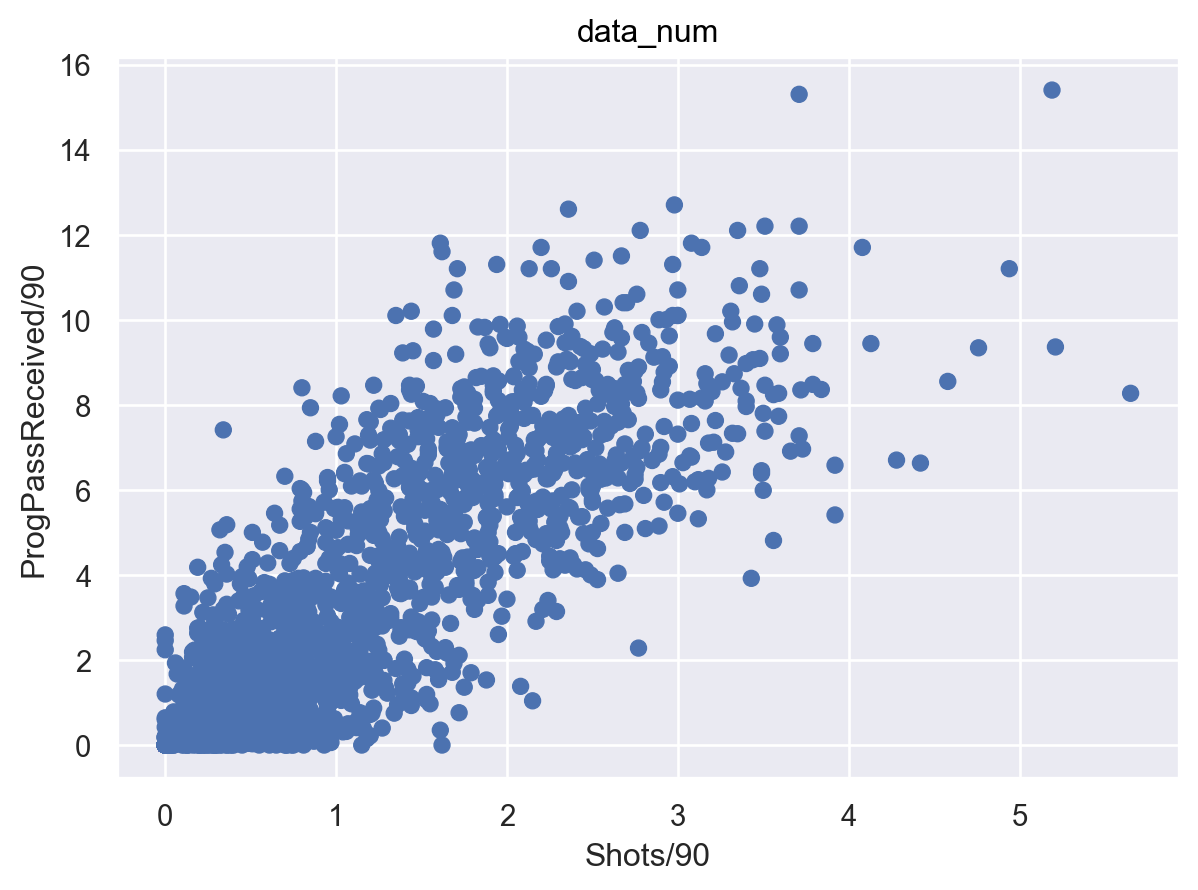

In [8]:
# Se toman dos variables cualquiera
(
    so.Plot(data_num, x = 'Shots/90', y = 'ProgPassReceived/90')
    .add(so.Dot())
    .label(title = "data_num")
)

*   Tomando por ejemplo, las variables *'Shots/90'* y *'ProgPassReceived/90'* no se observan grupos con facilidad

*   **(b)** Escalar los datos y realizar un análisis de componentes principales, quedándose solo con las dos primeras componentes. Realizar un gráfico como el del punto anterior. ¿Cuántos clusters puede distinguir en el gráfico? ¿A qué características de los jugadores pueden corresponder los clusters? ¿Cómo pueden verificar su conjetura? (realizar una visualización o algún cálculo)

In [9]:
# Se aplica reescalado por normalización:
data_norm = StandardScaler().fit_transform(data_num)

# Se define el modelo:
pca = PCA(n_components=2)

# Se entrena el modelo:
df_pca = pca.fit_transform(data_norm)

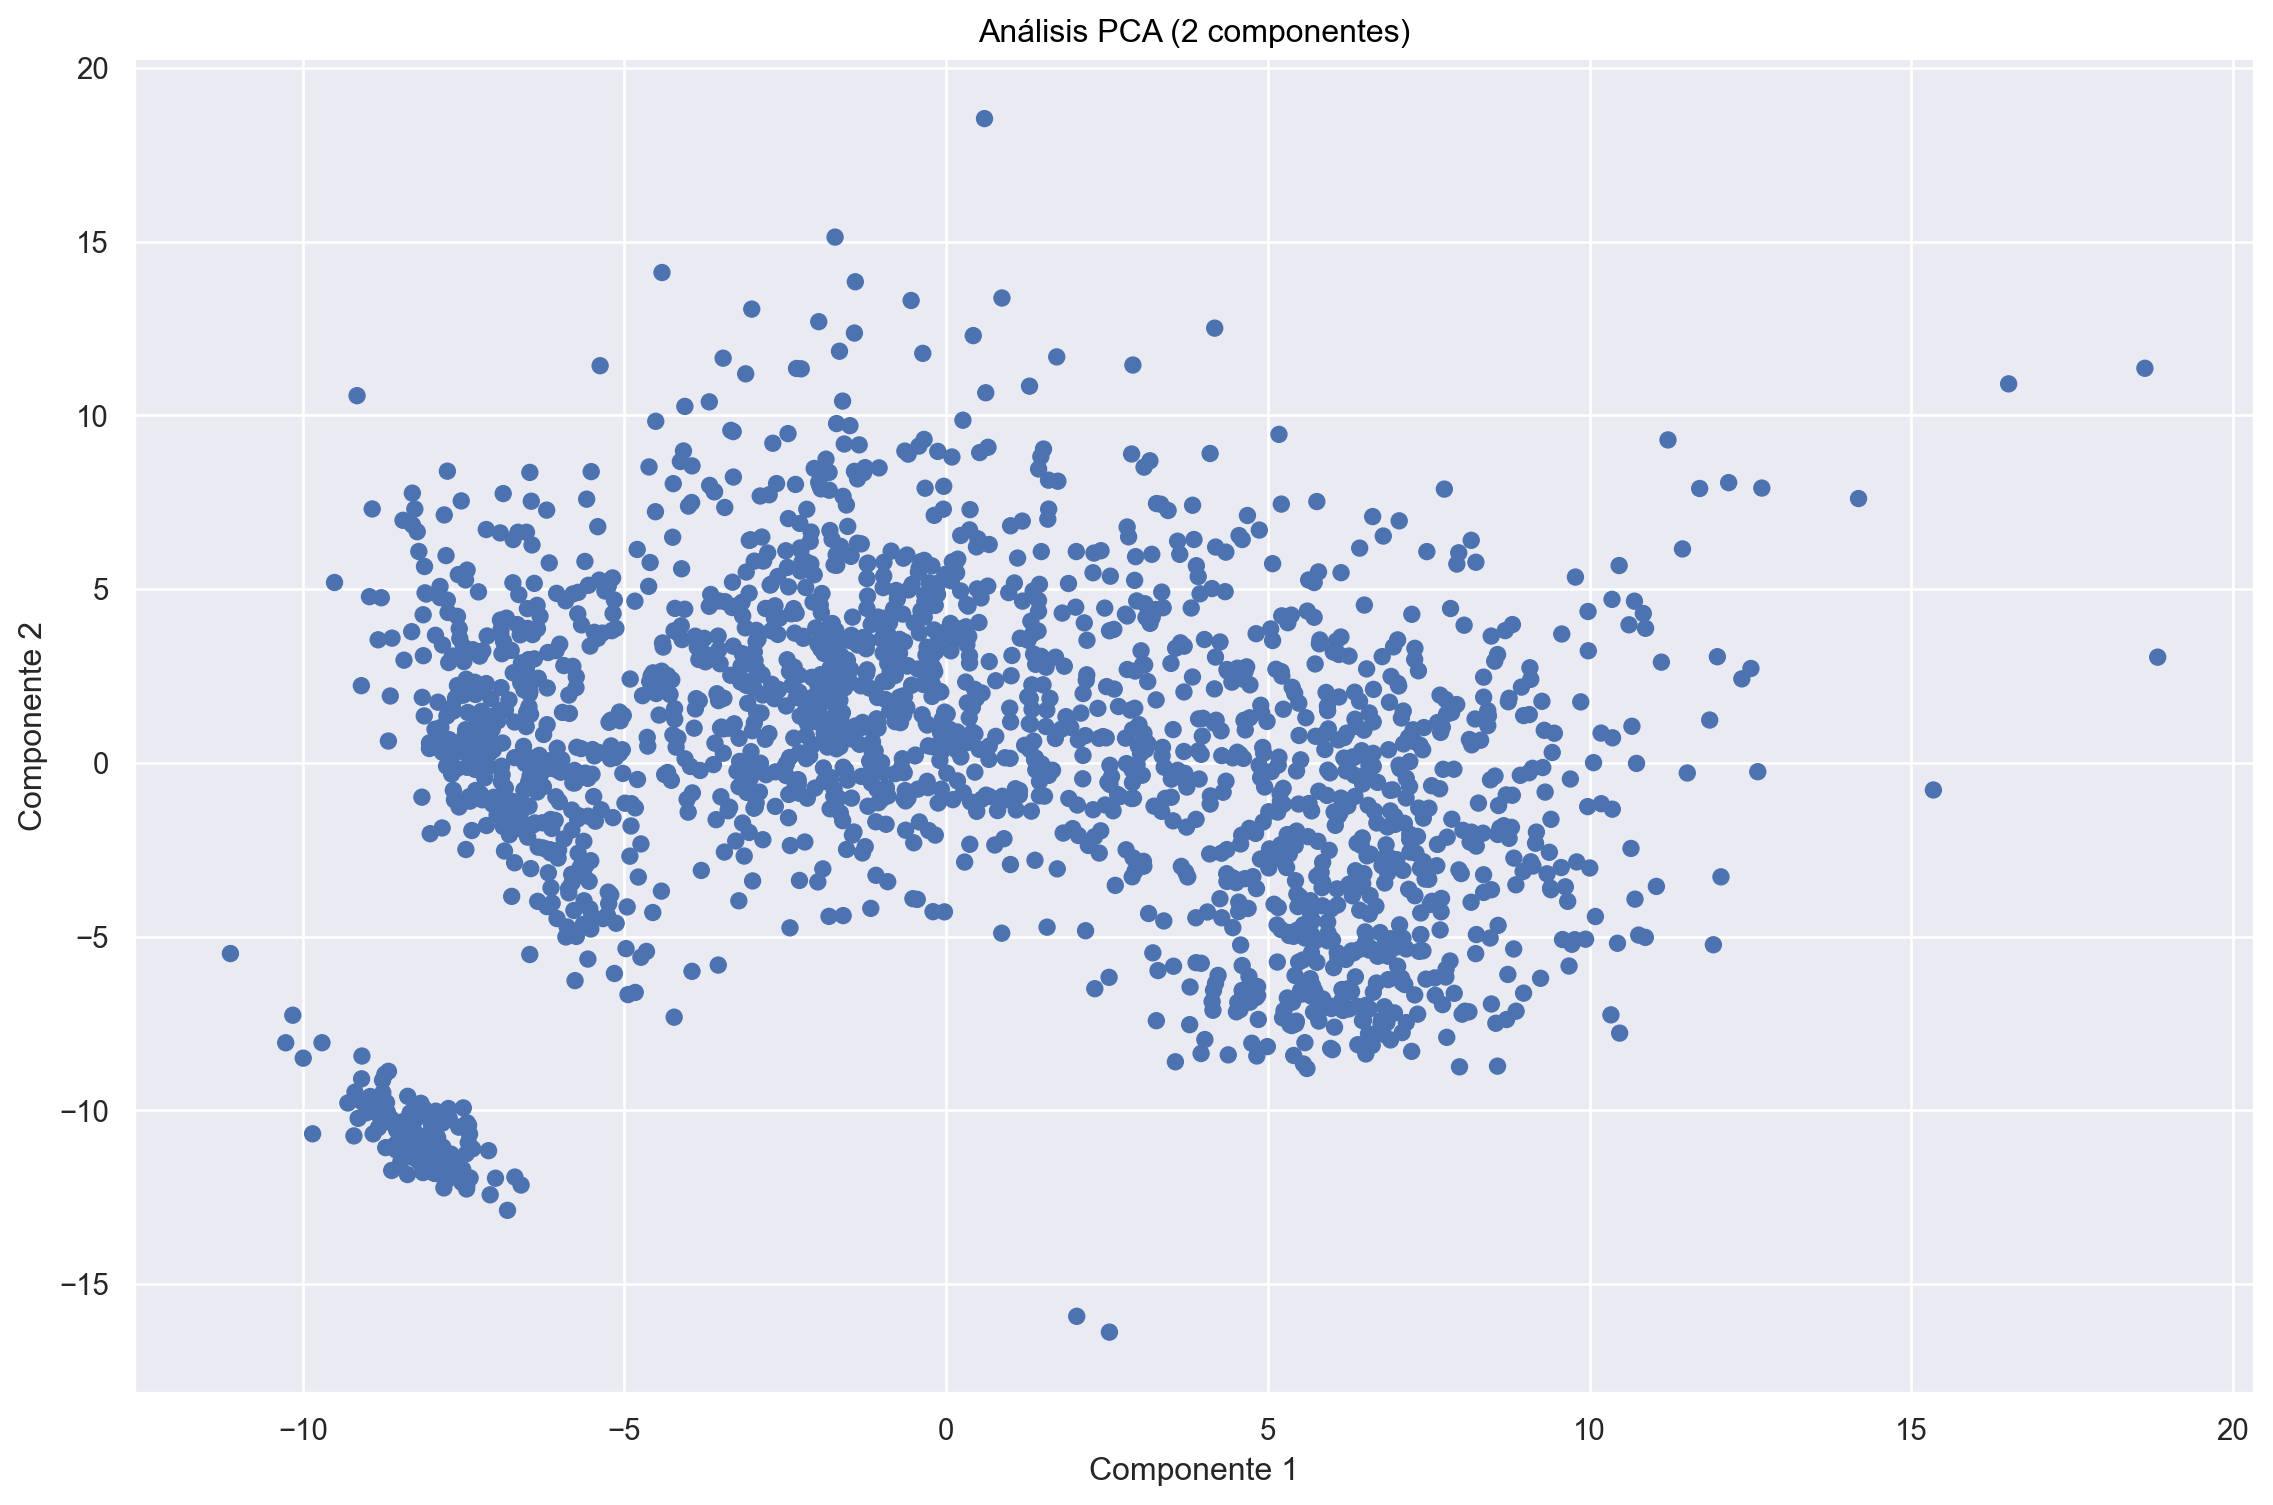

In [10]:
# Se grafica el resultado:
(
    so.Plot(x = df_pca[:,0], y = df_pca[:,1])
    .add(so.Dot())
    .label(title = "Análisis PCA (2 componentes)", x = "Componente 1", y = "Componente 2")
    .layout(size=(12,8))
)

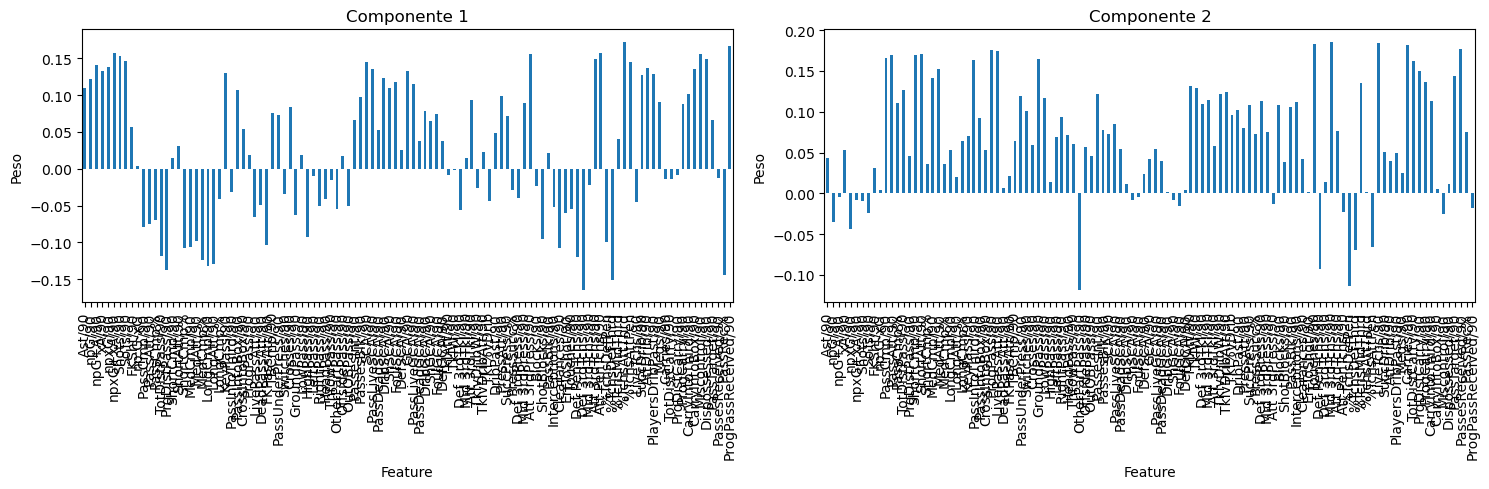

In [11]:
# Se crea un DataFrame para facilitar la interpretación
df_componentes = pd.DataFrame(pca.components_, columns=data_num.columns, index=['PC1', 'PC2'])

# Visualización de los pesos de las componentes principales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, ax in enumerate(axes):
    componentes = df_componentes.iloc[i]
    componentes.plot(kind='bar', ax=ax)
    ax.set_title(f'Componente {i+1}')
    ax.set_ylabel('Peso')
    ax.set_xlabel('Feature')

plt.tight_layout()
plt.show()

In [12]:
df_componentes

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
PC1,0.109944,0.121377,0.141309,0.132278,0.137799,0.156764,0.152551,0.146321,0.056131,0.004117,...,-0.008122,0.087878,0.100818,0.135458,0.156036,0.148921,0.066236,-0.012773,-0.144399,0.166429
PC2,0.042933,-0.035737,-0.004243,0.052737,-0.043810,-0.008122,-0.009825,-0.024629,0.031137,0.004375,...,0.150202,0.135987,0.113267,0.005159,-0.025669,0.010841,0.144198,0.177147,0.075502,-0.017455


In [13]:
# Se muestran las columnas de mayor peso de cada componente
for i in range(pca.n_components_):
    features_ordenados = np.abs(pca.components_[i]).argsort()[::-1]
    print(f"Top features del compomente {i+1}:")
    for feature in features_ordenados[0:10]:
        print(f"Feature {df_componentes.columns[feature]}: {np.abs(pca.components_[i][feature])}")
    print("\n")

Top features del compomente 1:
Feature %TchsAttThrd: 0.17239137015440406
Feature ProgPassReceived/90: 0.16642868004476485
Feature Def 3rdTchs/90: 0.16444356867658735
Feature Att PenTchs/90: 0.1576871301069234
Feature npxG+xA/90: 0.15676372591510176
Feature Miscontrol/90: 0.1560361146498148
Feature Att 3rdPress/90: 0.15591354572861693
Feature Shots/90: 0.15255142609405345
Feature %TchsDefThrd: 0.15111162670816358
Feature Att 3rdTchs/90: 0.1490653984471998


Top features del compomente 2:
Feature Mid 3rdTchs/90: 0.18581790381850347
Feature LiveTchs/90: 0.18465070973842945
Feature Touches/90: 0.18295322824715035
Feature Carries/90: 0.1816508532027345
Feature PassesReceived/90: 0.1771468904700385
Feature ProgPass/90: 0.1752122778470396
Feature LivePassAtt/90: 0.17392146143674503
Feature ShortAtt/90: 0.17025814807728065
Feature ShortCmp/90: 0.17015212414696548
Feature PassAtt/90: 0.16986902304011073




   **Top features del componente 1:**  %TchsAttThrd, ProgPassReceived/90, Def 3rdTchs/90.

   **Top features del componente 2:** Mid 3rdTchs/90, LiveTchs/90, Touches/90, Carries/90, PassesReceived/90

*   **Búsqueda óptima de clusters**

In [14]:
# Se utiliza KMeans probando con diferente cantidad de clusters
wcss = []
scaler = MinMaxScaler().set_output(transform="pandas")
data_scaled = scaler.fit_transform(data_num)

# Entre 1 y 10 custers
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, n_init="auto", max_iter = 300)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

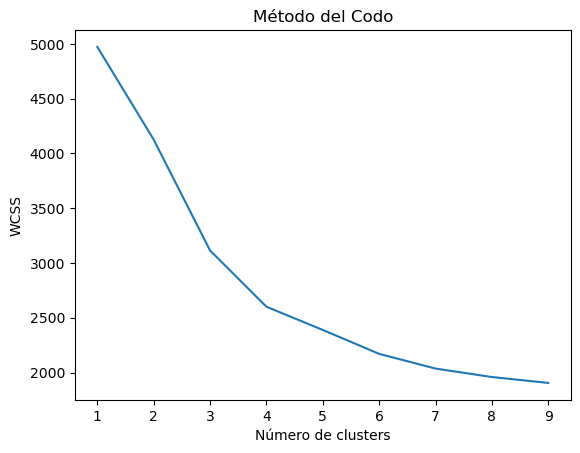

In [15]:
plt.plot(range(1,10), wcss)
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

*   Se determinan 4 clústers, para continuar

*   **(c)** Para la cantidad de clusters observados en el ítem anterior, realizar un agrupamiento por k-medias, y colorear los puntos según las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?

In [16]:
# Aplicar KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans.fit(data_norm)

#Reescalado de los centros, ya que usamos datos normalizados
centros_pca = pca.transform(kmeans.cluster_centers_)

c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


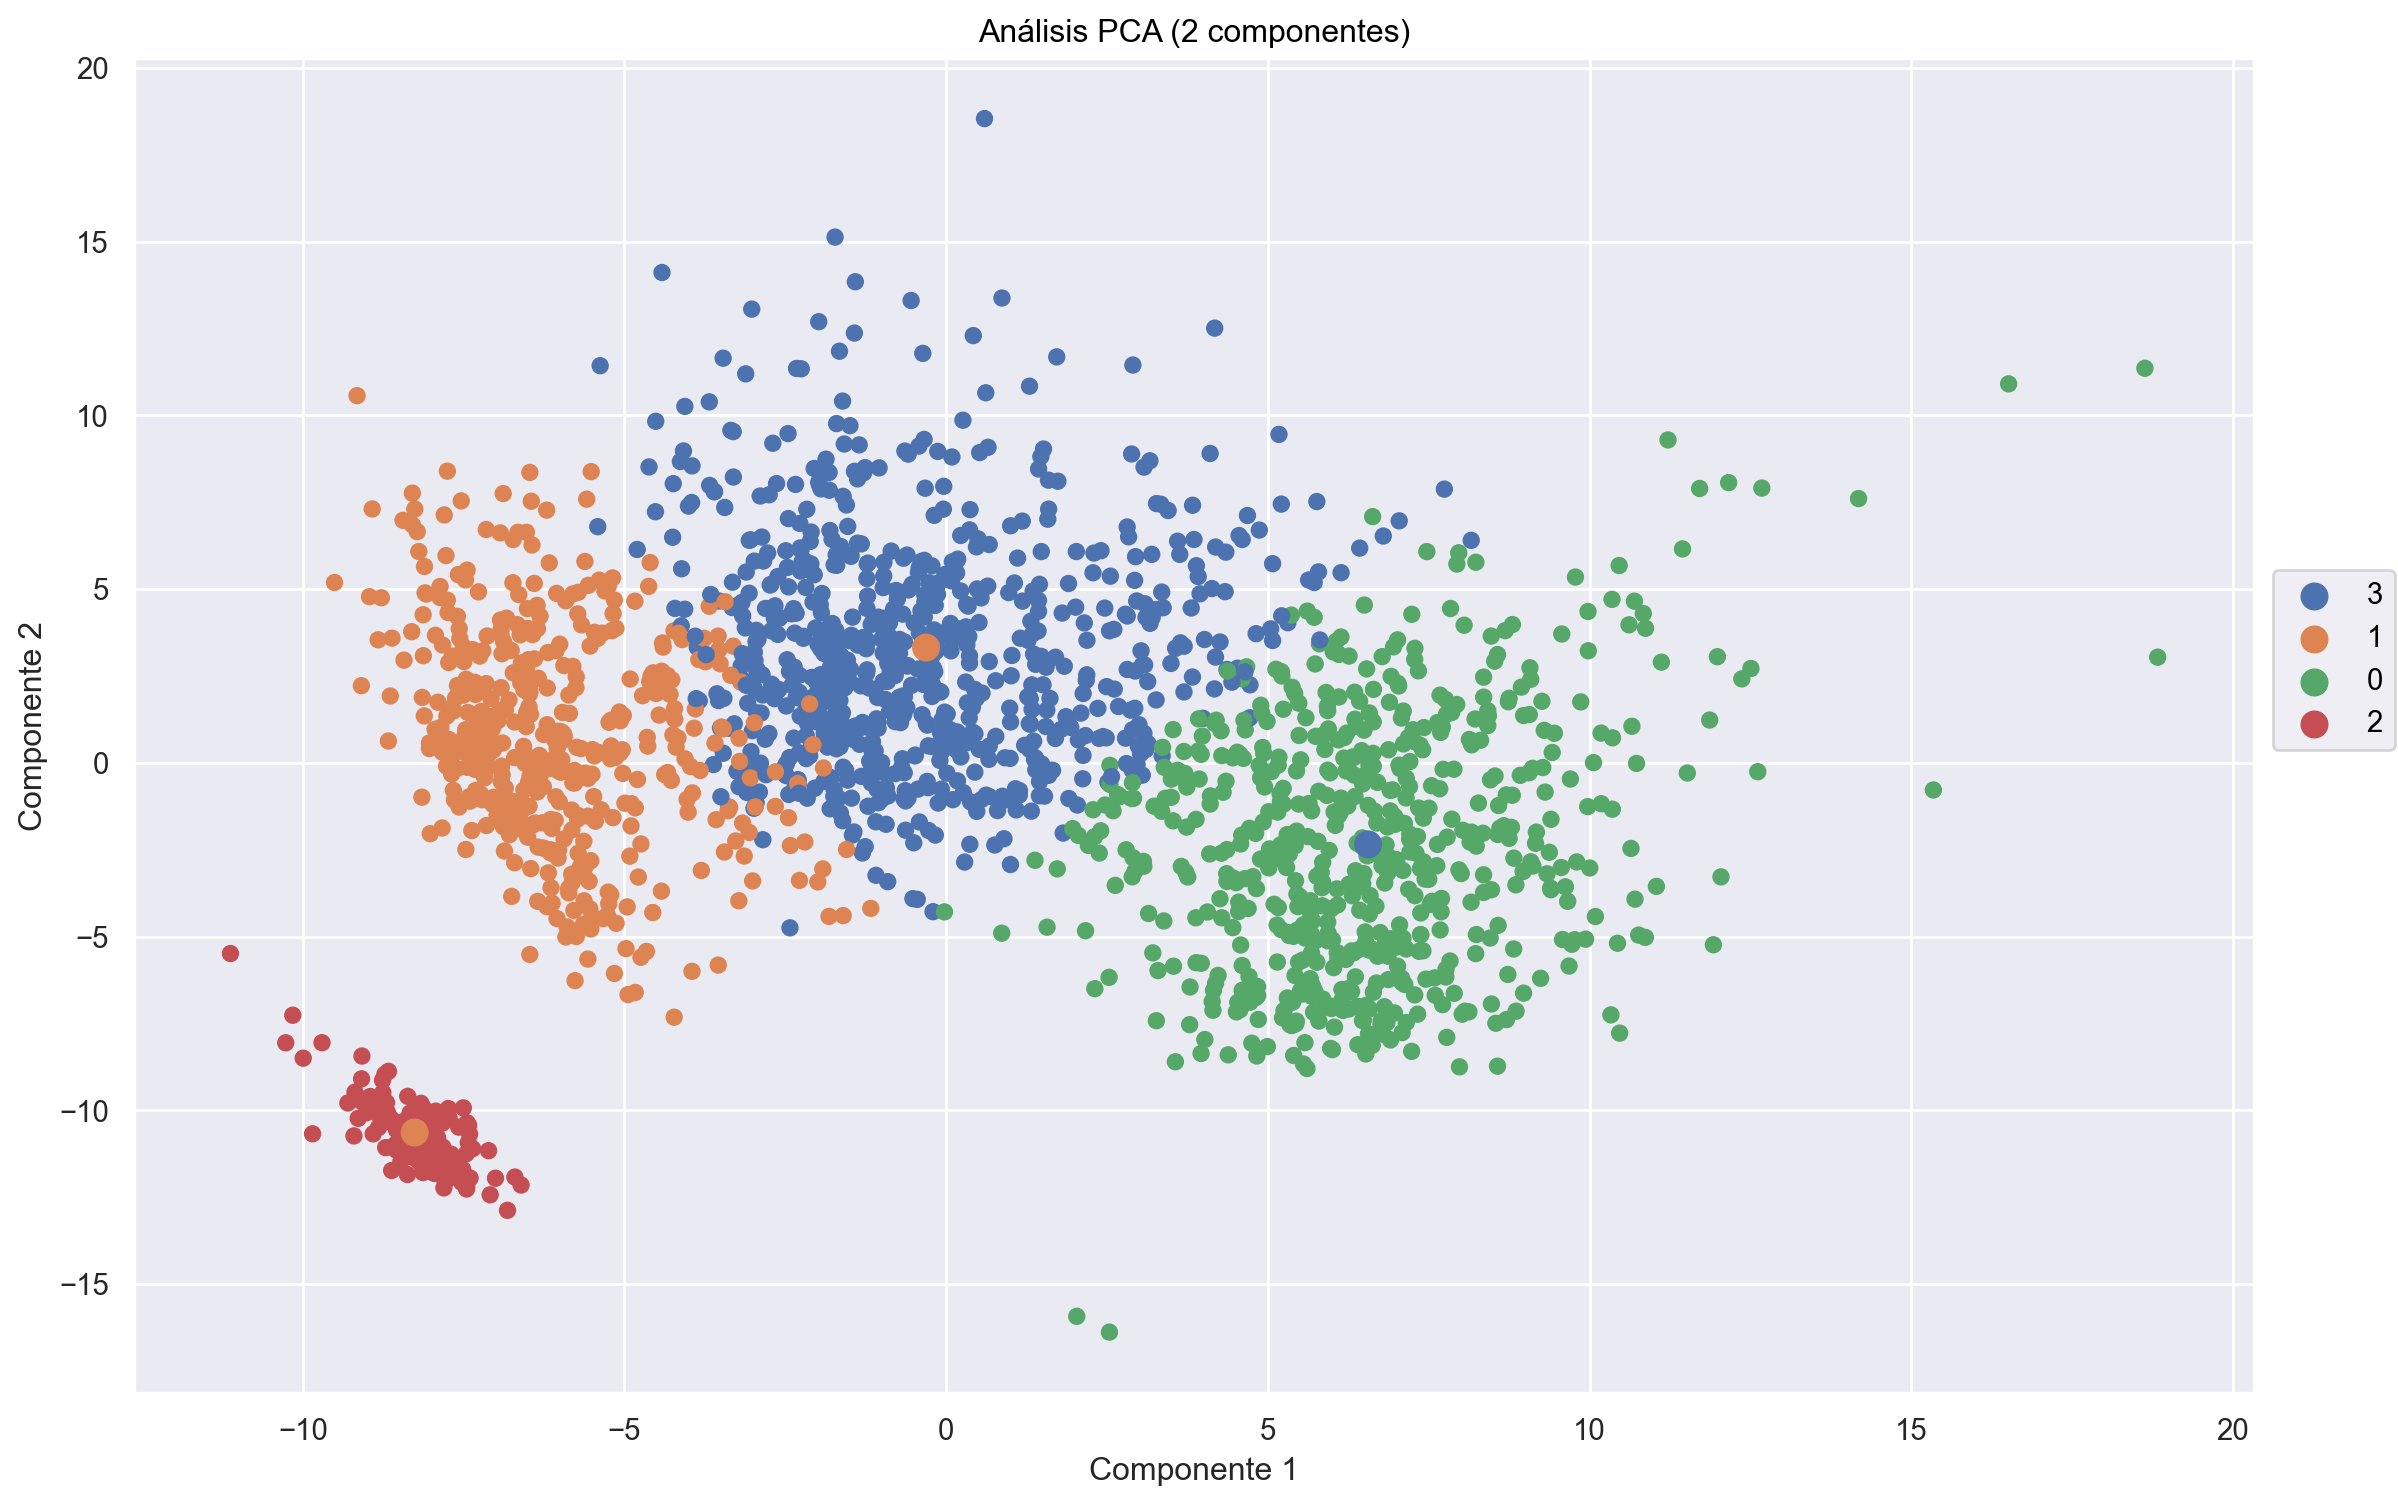

In [17]:
# Gráfica de los clusters
(
    so.Plot(x = df_pca[:,0], y = df_pca[:,1], color = kmeans.labels_.astype("str"))
    .add(so.Dot())
    .add(so.Dot(pointsize = 10), x = centros_pca[:, 0], y = centros_pca[:, 1])
    .label(title = "Análisis PCA (2 componentes)", x = "Componente 1", y = "Componente 2")
    .layout(size=(12,8))
)

*   Se observa que las etiquetas coinciden con lo predicho. Los agrupamientos tienen relación con la posición que ocupan en el campo. El cluster aislado está asociado a la posición de arquero, mientras que los restantes, en orden de izquierda a derecha, agrupan defensores, mediocampistas y delanteros

In [18]:
# MF = Mediocampista
# DF = Defensor
# GK = Arquero
# FW = Delantero
pos_etiq = pd.concat([df_torneos['Pos'], pd.DataFrame(kmeans.labels_, columns = ['Clusters'])], axis = 1)
pos_etiq.groupby('Clusters').value_counts()

Clusters  Pos  
0         FW       249
          FW,MF    189
          MF,FW    123
          MF        41
          FW,DF      7
          DF,FW      5
          MF,DF      3
          DF,MF      1
          DF         1
1         DF       381
          MF        40
          DF,MF     18
          MF,DF     14
          MF,FW      1
2         GK       132
3         MF       315
          DF       313
          MF,FW     40
          DF,MF     36
          MF,DF     28
          FW,MF     11
          DF,FW     10
          FW,DF      4
Name: count, dtype: int64

*   **(d)** Repetir el agrupamiento utilizando DBSCAN. ¿Cómo elegirían en este caso un valor de ε apropiado? Sugerencia: consultar la sección ”Selección del hiperparámetro eps” del Notebook de la clase de DBSCAN (o utilizar cualquier otra técnica que consideren apropiada)

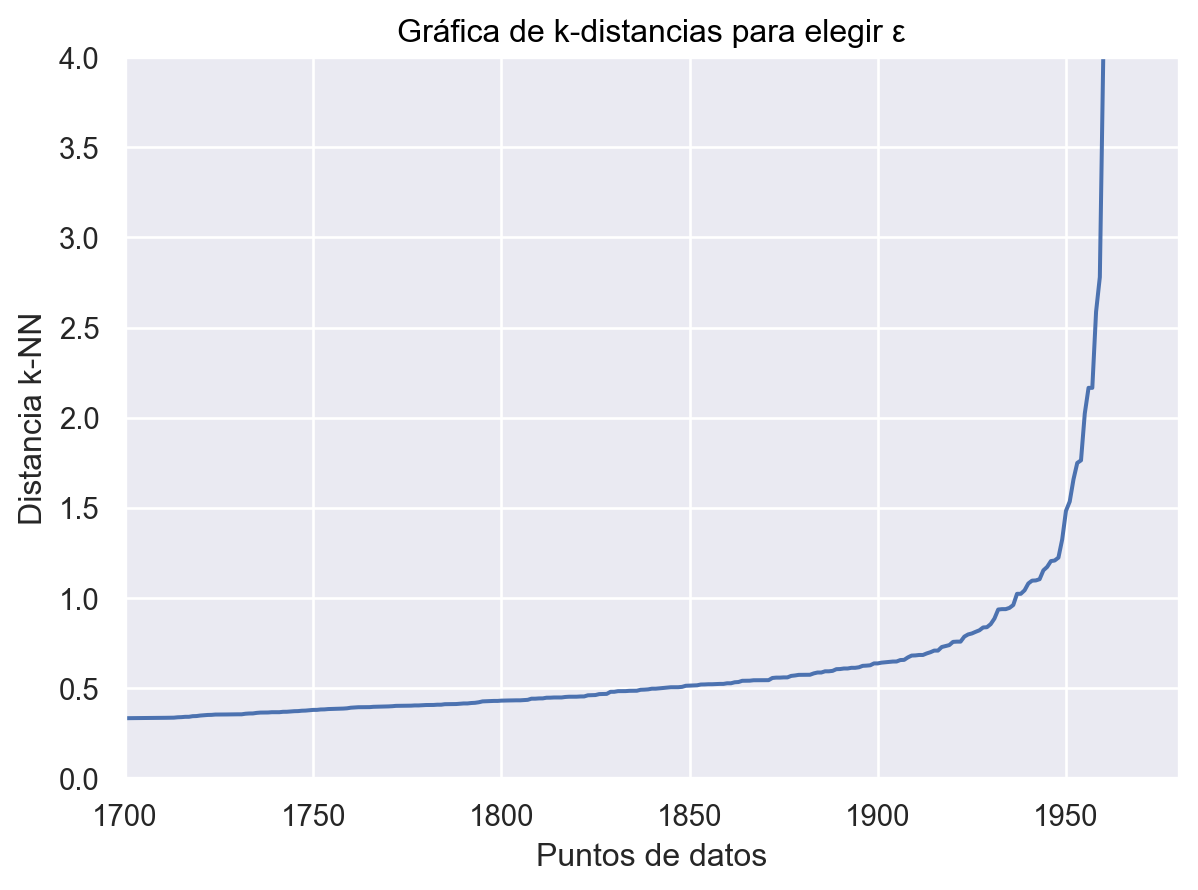

In [19]:
# Determinamos el valor de ε usando una gráfica de K-NN
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

(
    so.Plot(x = np.arange(len(distances)), y = distances)
    .add(so.Line())
    .limit(x=(1700, 1980), y=(0, 4))
    .label(title = 'Gráfica de k-distancias para elegir ε', x = 'Puntos de datos', y = 'Distancia k-NN')
)

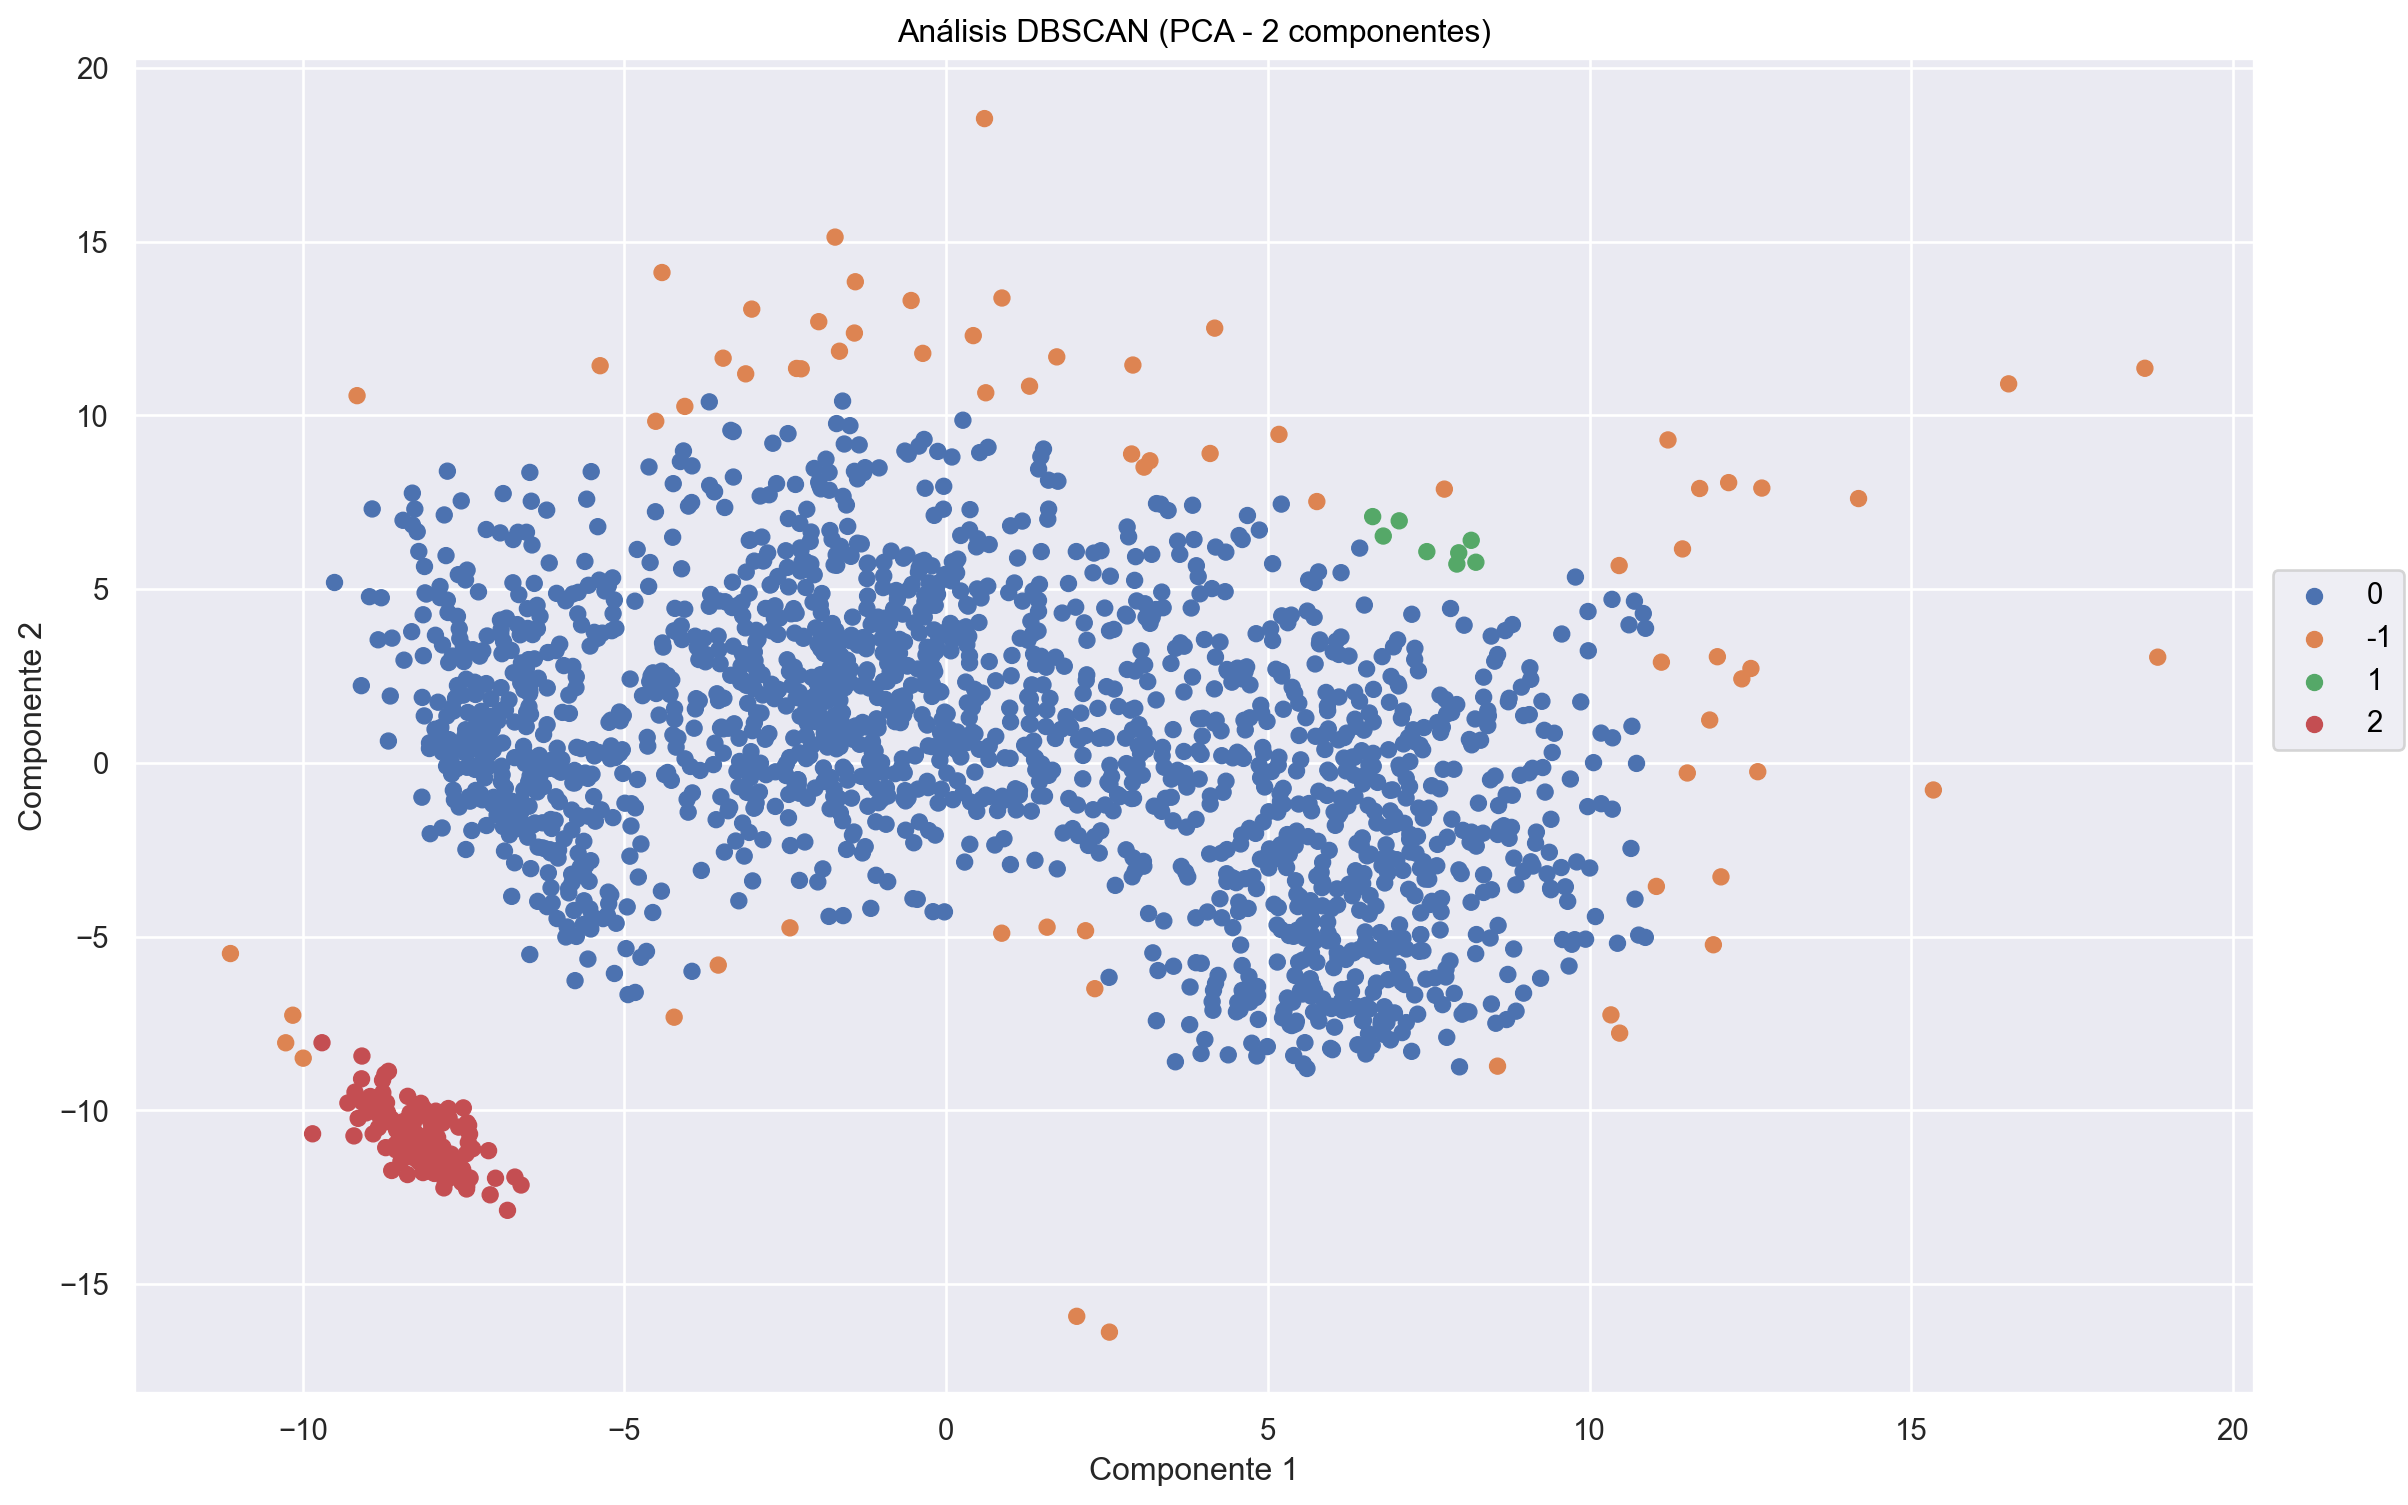

In [20]:
epsilon = 0.9

# Se aplica DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan.fit(df_pca)

(
    so.Plot(x = df_pca[:,0], y = df_pca[:,1], color = dbscan.labels_.astype("str"))
    .add(so.Dot())
    .label(title = "Análisis DBSCAN (PCA - 2 componentes)", x = "Componente 1", y = "Componente 2")
    .layout(size=(12,8))
)

*   Con DBSCAN sólo se obtienen los 2 grupos principales (Arquero y el resto)

In [21]:
# MF = Mediocampista
# DF = Defensor
# GK = Arquero
# FW = Delantero
pos_etiq2 = pd.concat([df_torneos['Pos'], pd.DataFrame(dbscan.labels_, columns = ['Clusters'])], axis = 1)
pos_etiq2.groupby('Clusters').value_counts()

Clusters  Pos  
-1        MF        21
          FW        14
          DF        11
          FW,MF      9
          MF,FW      6
          GK         4
          DF,MF      2
          DF,FW      1
          MF,DF      1
 0        DF       683
          MF       375
          FW       234
          FW,MF    189
          MF,FW    156
          DF,MF     52
          MF,DF     44
          DF,FW     14
          FW,DF     10
 1        FW,MF      2
          MF,FW      2
          DF         1
          DF,MF      1
          FW         1
          FW,DF      1
 2        GK       128
Name: count, dtype: int64

*   **(e)** Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos componentes principales, modificando los valores de epsilon y minPts convenientemente. ¿Con cuál de las dos opciones obtienen mejores resultados?


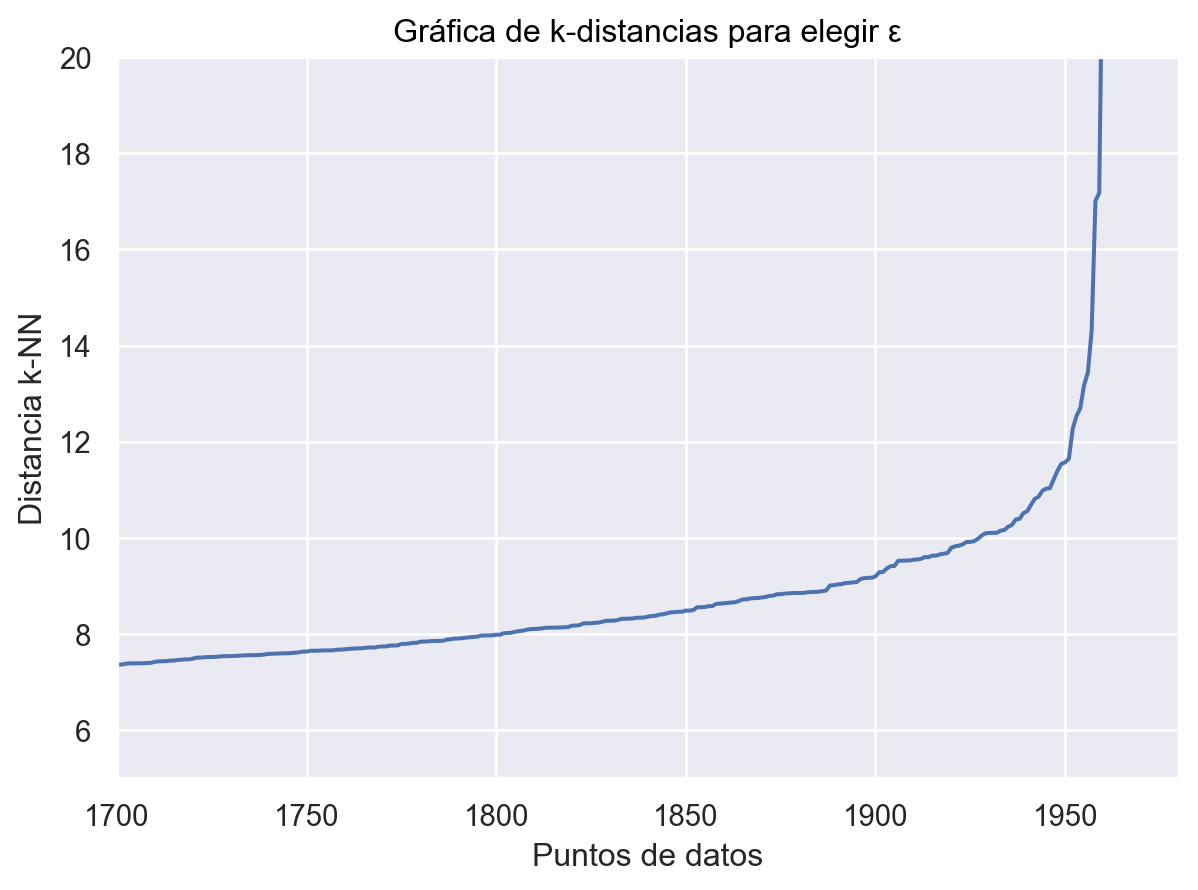

In [22]:
# Se determina el valor de ε usando una gráfica de K-NN
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_norm)
distances, indices = neighbors_fit.kneighbors(data_norm)

# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

(
    so.Plot(x = np.arange(len(distances)), y = distances)
    .add(so.Line())
    .limit(x=(1700, 1980), y=(5, 20))
    .label(title = 'Gráfica de k-distancias para elegir ε', x = 'Puntos de datos', y = 'Distancia k-NN')
)

In [23]:
epsilon = 10

# Se aplica DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan.fit(data_norm)

DBSCAN(eps=10)

In [24]:
# MF = Mediocampista
# DF = Defensor
# GK = Arquero
# FW = Delantero
pos_etiq2 = pd.concat([df_torneos['Pos'], pd.DataFrame(dbscan.labels_, columns = ['Clusters'])], axis = 1)
pos_etiq2.groupby('Clusters').value_counts()

Clusters  Pos  
-1        FW,MF     13
          MF,FW      8
          FW         7
          MF         6
          DF         3
          DF,MF      1
          GK         1
 0        DF       692
          MF       390
          FW       242
          FW,MF    187
          MF,FW    156
          DF,MF     54
          MF,DF     45
          DF,FW     15
          FW,DF     11
 1        GK       131
Name: count, dtype: int64

*   Los resultados son similares al obtenido con PCA, con menos ruido, lo cual es esperable ya que PCA tiene pérdida.

## **Clasificación**

7. Ahora queremos poder predecir la posición en la que juega cada jugador según sus datos
estadísticos utilizando KNN. En la columna **Pos** encontramos la posición de los jugadores.
Para la mayoría de los jugadores se indica una única posición pero algunos jugadores tienen
dos posiciones. Para simplificar el análisis vamos a considerar una única posición por jugador.


+   **(a)** Definir la variable *"Pos_filt"* que es la columna *Pos*, pero donde los jugadores deben tener una sola posición (pueden quedarse sólo con la primera posición de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren más conveniente).

In [25]:
# Se obtienen los jugadores que tienen mas de una posición
df_torneos[np.char.str_len(df_torneos["Pos"].values.astype(str))>2]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
695,Ruben Aguilar,fr FRA,"DF,FW",Monaco,fr Ligue 1,27.0,1993.0,33,27,2225,...,137.4,6.80,2.19,0.20,1.17,1.09,57.6,48.6,84.3,5.06
696,Marc Albrighton,eng ENG,"DF,FW",Leicester City,eng Premier League,30.0,1989.0,31,17,1746,...,95.2,4.54,1.24,0.41,1.13,2.01,47.1,37.1,78.7,3.66
697,Angeliño,es ESP,"DF,FW",RB Leipzig,de Bundesliga,23.0,1997.0,26,24,2161,...,101.0,4.83,1.21,0.58,0.88,0.92,54.7,46.0,84.2,6.25
698,Joe Bryan,eng ENG,"DF,FW",Fulham,eng Premier League,26.0,1993.0,16,7,669,...,117.6,6.22,2.16,0.00,1.49,0.68,42.3,38.4,90.7,1.35
699,Maxwel Cornet,ci CIV,"DF,FW",Lyon,fr Ligue 1,23.0,1996.0,36,29,2446,...,127.6,5.77,1.40,0.44,0.92,0.99,48.4,44.6,92.2,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1958,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1959,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1960,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [26]:
# Dada la cantidad de jugadores en esta situación, se decide asignar la primera posición de cada uno
Pos_filt=df_torneos["Pos"].str[0:2]
Pos_filt.name="Pos_filt"

*   **(b)** Construir el DataFrame **data_clasif** que resulta de agregarle la columna de *"Pos_filt"* al DataFrame **data_num**.

    Dividir data_num en un 80% para entrenamiento y un 20% para testeo.

In [27]:
# Se genera el DataFrame data_clasif
data_clasif=pd.concat([Pos_filt,data_num], axis=1)

# Se separan las varibles de respuesta (y) de las explicativas (x)
x= data_clasif.drop(["Pos_filt"], axis=1)
y= data_clasif["Pos_filt"]

# Se escalan los datos numéricos para luego poder aplicar K-Nearest Neighbors
X = MinMaxScaler().set_output(transform="pandas").fit_transform(x)

# Se dividen los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

*   **(c)** Aplicar un esquema de validación en el conjunto de entrenamiento para seleccionar el valor óptimo de K. (Esto puede demorar mucho si prueban muchos valores de K, pueden hacerlo hasta un valor máximo de K = 20.)

    **Sugerencia:** puede resultar de ayuda KNeighborsClassifier de sklearn e investigar esa librería para aplicar esquemas de validación.

In [28]:
# Se realizará el entrenamiento probando hasta un K máximo de 20
K_max=20
K_values=np.arange(K_max) # array con índice de 0 a 19

# Teniendo en cuenta la sugerencia, se utilizará cross validation utilizando k-fold con 5 splits para cada valor de K
# Este esquema de validación se obtuvo de la documentación de sklearn: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scores = np.zeros(K_max, dtype=float)

for K in K_values: # K valor entre 0 y 19
    knn = KNeighborsClassifier(n_neighbors=(K+1))
    score = cross_val_score(knn, X_train, y_train, cv=KFold(n_splits=5, random_state=10, shuffle=True), scoring=make_scorer(accuracy_score))
    scores[K] = np.mean(score)

valor_optimo_K = scores.argmax()+1
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de entrenamiento:", scores.max())

El valor óptimo de K es: 19
Precisión en los datos de entrenamiento: 0.9235099000834334


*   **(d)** Para el valor de K obtenido, ¿cuál es el porcentaje de aciertos en el conjunto de testeo?

In [29]:
# Se verifica la precisión en los datos de testeo
knn = KNeighborsClassifier(n_neighbors=(valor_optimo_K))

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de testeo:", accuracy_score(y_test,y_pred))

El valor óptimo de K es: 19
Precisión en los datos de testeo: 0.9211195928753181


*   **Paso extra:** A continuación se ejecuta la validación cruzada sin utilizar "cross_val_score" para verificar que el resultado es el mismo 

In [30]:
cv = KFold(n_splits=5, random_state=10, shuffle=True)
scores = np.zeros(K_max, dtype=float)

for K in range(0,20):
    neighbor = KNeighborsClassifier(n_neighbors=K+1)
    scores_fold = np.zeros(5, dtype=float)
    i=0
    
    for train_index, val_index in cv.split(X_train):
        X_train_fold, X_val_fold, y_train_fold, y_val_fold = X_train.iloc[train_index], X_train.iloc[val_index], y_train.iloc[train_index], y_train.iloc[val_index]
        neighbor.fit(X_train_fold,y_train_fold)
        y_pred_fold = neighbor.predict(X_val_fold)
        scores_fold[i]=accuracy_score(y_val_fold,y_pred_fold)
        i+=1
    
    scores[K]=scores_fold.mean()

print("El valor optimo de K es:", scores.argmax()+1)
print("Precisión:",scores.max())
        

El valor optimo de K es: 19
Precisión: 0.9235099000834334


*   **(e)** Repetir el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables. Indicar si se obtienen mejores resultados.

In [31]:
df_PCA=pd.DataFrame({"componente_1":df_pca[:,0], "componente_2":df_pca[:,1]})
df_PCA

,componente_1,componente_2
0,-1.898744,3.150660
1,-6.707404,1.176213
2,-7.048267,-1.192254
3,-5.074835,0.273977
4,-6.502105,3.870792
...,...,...
1957,0.863535,-4.902117
1958,8.801375,3.981418
1959,7.151298,-0.443843
1960,6.541966,-2.675575


In [32]:
# Se genera el DataFrame data_clasif_PCA
data_clasif_PCA=pd.concat([Pos_filt,df_PCA], axis=1)

# Se separan las varibles de respuesta (y) de las explicativas (x)
x= data_clasif_PCA.drop(["Pos_filt"], axis=1)
y= data_clasif_PCA["Pos_filt"]

# Se escalan los datos numéricos para luego poder aplicar K-Nearest Neighbors
X = MinMaxScaler().set_output(transform="pandas").fit_transform(x)

# Se dividen los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Se realizará el entrenamiento probando hasta un K máximo de 20
K_max=20
K_values=np.arange(K_max) # array con índice de 0 a 19

# Teniendo en cuenta la sugerencia, se utilizará cross validation utilizando k-fold con 5 splits para cada valor de K
# Este esquema de validación se obtuvo de la documentación de sklearn: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scores = np.zeros(K_max, dtype=float)

for K in K_values: # K valor entre 0 y 19
    knn = KNeighborsClassifier(n_neighbors=(K+1))
    score = cross_val_score(knn, X_train, y_train, cv=KFold(n_splits=5, random_state=10, shuffle=True), scoring=make_scorer(accuracy_score))
    scores[K] = np.mean(score)

valor_optimo_K = scores.argmax()+1
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de entrenamiento:", scores.max())

# Se verifica la precisión en los datos de testeo
knn = KNeighborsClassifier(n_neighbors=(valor_optimo_K))

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("---------------------------------\n")
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de testeo:", accuracy_score(y_test,y_pred))

X_test

El valor óptimo de K es: 15
Precisión en los datos de entrenamiento: 0.7520502228281882
---------------------------------

El valor óptimo de K es: 15
Precisión en los datos de testeo: 0.7379134860050891


,componente_1,componente_2
1826,0.508358,0.435143
721,0.373134,0.496734
1724,0.464379,0.591585
1102,0.566613,0.351281
1208,0.614467,0.554288
...,...,...
1053,0.771520,0.556560
636,0.220919,0.526249
1378,0.592944,0.502850
948,0.599620,0.401533


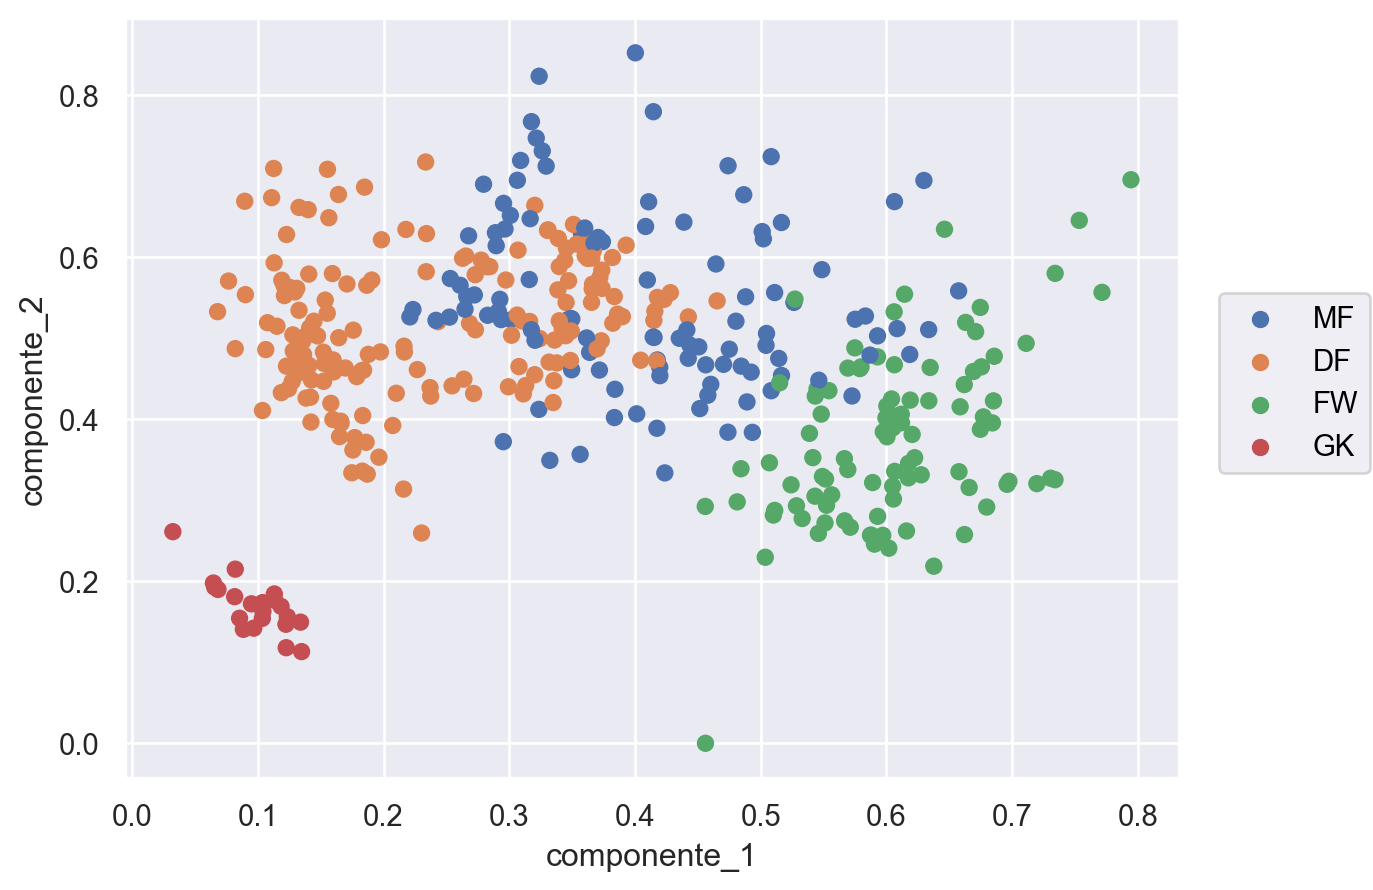

In [33]:
# Se visualizarn las predicciones del conjunto testeo
(
    so.Plot(data=X_test, x="componente_1", y="componente_2",color=y_pred)
    .add(so.Dot())
)

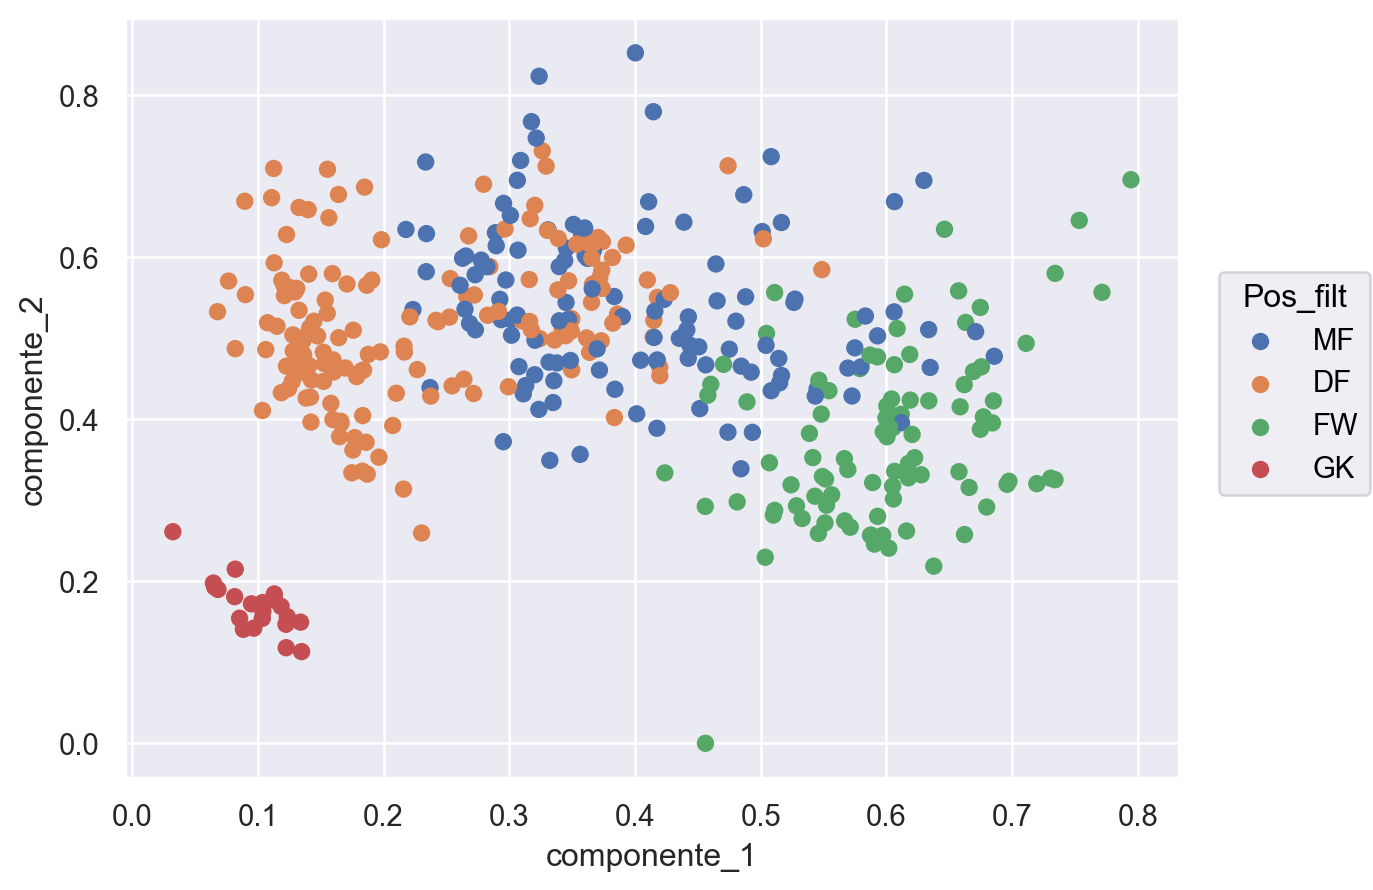

In [34]:
# Se visualizan las observaciones del conjunto de testeo
(
    so.Plot(data=X_test, x="componente_1", y="componente_2", color=y_test)
    .add(so.Dot())
)

*   Si bien se pierde precisión utilizando la primeras dos componentes de PCA, se sigue obteniendo un buen resultado en el porcentaje de la predicción

8. Repetir el mismo método de clasificación con el dataset de jugadoras de la liga inglesa femenina **superleague2023.csv**. Para esto, quedarse con la columna *Pos* y las columnas a partir de *MP*, inclusive. ¿Qué porcentaje de aciertos obtienen en este caso? ¿Puede modificarse el parámetro para obtener un porcentaje mayor?

In [35]:
df_liga_inglesa_femenina=pd.read_csv("superleague2023.csv")
df_liga_inglesa_femenina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rk                      304 non-null    int64  
 1   Player                  304 non-null    object 
 2   Nation                  299 non-null    object 
 3   Pos                     304 non-null    object 
 4   Squad                   304 non-null    object 
 5   Age                     298 non-null    float64
 6   Born                    298 non-null    float64
 7   MP                      304 non-null    int64  
 8   Starts                  304 non-null    int64  
 9   Min                     304 non-null    object 
 10  90s                     304 non-null    float64
 11  Performance_Gls         304 non-null    int64  
 12  Performance_Ast         304 non-null    int64  
 13  Performance_G+A         304 non-null    int64  
 14  Performance_G-PK        304 non-null    in

In [36]:
# Se busca la posición de la columna 'MP'
array=np.array(df_liga_inglesa_femenina.columns)
pos_col=np.where(array=='MP')[0].item()

# Se eliminan todas las columnas hasta la posición de la columna 'MP', el dataFrame resultado se asigna a data_num_2
data_num_2= df_liga_inglesa_femenina.drop(columns=array[0:pos_col])
data_num_2

,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,11,0,87,1.0,0,1,1,0,0,0,...,0.00,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,1,0,6,0.1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0,1,0.0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,16,10,923,10.3,1,2,3,1,0,0,...,0.10,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,6,4,296,3.3,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2,1,118,1.3,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
300,22,22,"1,980",22.0,1,6,7,0,1,1,...,0.05,0.27,0.32,0.0,0.27,0.07,0.27,0.34,0.04,0.30
301,20,18,"1,568",17.4,0,1,1,0,0,0,...,0.00,0.06,0.06,0.0,0.06,0.03,0.06,0.09,0.03,0.09
302,18,18,"1,620",18.0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [37]:
# Se convierte a numérica la columna Min, previamente se quitan comas que se utilizan como separadores de mil
data_num_2["Min"]=pd.to_numeric(data_num_2["Min"].astype(str).str.replace(',',''), errors='coerce')

In [38]:
# Se verifica que no hay valores nan
print("¿Hay valores faltantes?")
print((data_num_2.isna().sum(axis=1)>0).value_counts())


¿Hay valores faltantes?
False    304
Name: count, dtype: int64


In [39]:
# Se verifica que existen jugadoras que tienen mas de una posición
df_liga_inglesa_femenina[np.char.str_len(df_liga_inglesa_femenina["Pos"].values.astype(str))>2]

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,1,Princess Ademiluyi,eng ENG,"MF,FW",West Ham,17.0,2006.0,11,0,87,...,0.00,1.03,1.03,0.00,1.03,0.03,0.00,0.03,0.03,0.03
5,6,Asmita Ale,eng ENG,"MF,DF",Tottenham,21.0,2001.0,5,1,131,...,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.10,0.00,0.10
10,11,Viviane Asseyi,fr FRA,"FW,MF",West Ham,29.0,1993.0,22,22,"1,902",...,0.28,0.05,0.33,0.14,0.19,0.39,0.04,0.43,0.28,0.32
11,12,Izzy Atkinson,ie IRL,"MF,FW",West Ham,22.0,2001.0,7,1,172,...,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.16,0.16,0.16
12,13,Rosella Ayane,ma MAR,"FW,MF",Tottenham,27.0,1996.0,10,0,211,...,0.00,0.00,0.00,0.00,0.00,0.24,0.20,0.45,0.24,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,Matilda Vinberg,se SWE,"FW,MF",Tottenham,20.0,2003.0,11,4,357,...,0.25,0.25,0.50,0.25,0.50,0.30,0.25,0.55,0.30,0.55
288,289,Mari Ward,eng ENG,"MF,DF",Bristol City,17.0,2006.0,21,1,468,...,0.00,0.00,0.00,0.00,0.00,0.05,0.02,0.07,0.05,0.07
289,290,Clare Wheeler,au AUS,"MF,DF",Everton,25.0,1998.0,22,19,"1,794",...,0.00,0.05,0.05,0.00,0.05,0.00,0.02,0.02,0.00,0.02
290,291,Aileen Whelan,eng ENG,"FW,MF",Leicester City,31.0,1991.0,19,11,"1,055",...,0.09,0.09,0.17,0.09,0.17,0.13,0.11,0.24,0.13,0.24


In [40]:
# Se asigna la primera posición a las jugadoras que tienen mas de una y se concatena a las columnas numéricas
Pos_filt_2= df_liga_inglesa_femenina["Pos"].str[0:2]
data_clasif_2=pd.concat([Pos_filt_2,data_num_2], axis=1)

data_clasif_2

,Pos,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,MF,11,0,87,1.0,0,1,1,0,0,...,0.00,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,FW,1,0,6,0.1,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,MF,1,0,1,0.0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,MF,16,10,923,10.3,1,2,3,1,0,...,0.10,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,DF,6,4,296,3.3,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,DF,2,1,118,1.3,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
300,MF,22,22,1980,22.0,1,6,7,0,1,...,0.05,0.27,0.32,0.0,0.27,0.07,0.27,0.34,0.04,0.30
301,MF,20,18,1568,17.4,0,1,1,0,0,...,0.00,0.06,0.06,0.0,0.06,0.03,0.06,0.09,0.03,0.09
302,GK,18,18,1620,18.0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [41]:
# Se separan las varibles de respuesta (y) de las explicativas (x)
x= data_clasif_2.drop(["Pos"], axis=1)
y= data_clasif_2["Pos"]

# Se escalan los datos numéricos para luego poder aplicar K-Nearest Neighbors
X = MinMaxScaler().set_output(transform="pandas").fit_transform(x)

# Se dividen los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Se realizará el entrenamiento probando hasta un K máximo de 20
K_max=20
K_values=np.arange(K_max) # array con índice de 0 a 19

# Se utiliza cross validation utilizando k-fold con 5 splits para cada valor de K
scores = np.zeros(K_max, dtype=float)

for K in K_values: # K valor entre 0 y 19
    knn = KNeighborsClassifier(n_neighbors=(K+1))
    score = cross_val_score(knn, X_train, y_train, cv=KFold(n_splits=5, random_state=10, shuffle=True), scoring=make_scorer(accuracy_score))
    scores[K] = np.mean(score)

valor_optimo_K = scores.argmax()+1
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de entrenamiento:", scores.max())

# Se verifica la precisión en los datos de testeo
knn = KNeighborsClassifier(n_neighbors=(valor_optimo_K))

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("---------------------------------\n")
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de testeo:", accuracy_score(y_test,y_pred))

El valor óptimo de K es: 9
Precisión en los datos de entrenamiento: 0.5879251700680272
---------------------------------

El valor óptimo de K es: 9
Precisión en los datos de testeo: 0.639344262295082


In [42]:
# Si hubiesemos utilizado el mismo parámetro K obtenido en el data frame de la liga masculina:
valor_optimo_K= 19
knn = KNeighborsClassifier(n_neighbors=(valor_optimo_K))

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("---------------------------------\n")
print("El valor de K es:", valor_optimo_K, "(el mismo que la liga masculina)")
print("Precisión en los datos de testeo:", accuracy_score(y_test,y_pred))

---------------------------------

El valor de K es: 19 (el mismo que la liga masculina)
Precisión en los datos de testeo: 0.5409836065573771


Se verifica que utilizando el mismo K obtenido para la liga masculina no genera la mejor aproximación, hay que modificarlo con valor K=9

## **Recomendaciones de jugadores**

9. Trabajamos ahora con el dataset **transfermarkt_fbref_201920.csv** que incluye la valuación de los jugadores. Una de las aplicaciones más comunes de análisis de datos en el fútbol es para obtener recomendaciones de jugadores a comprar.

*   **(a)** En 2021 Messi fue transferido del Barcelona al PSG. Basándose en los datos disponibles, recomendarle a Barcelona un jugador de características similares a Messi pero de menor valor.

In [43]:
df_valuacion_jugadores = pd.read_csv('transfermarkt_fbref_201920.csv', delimiter =';')
print(df_valuacion_jugadores.info())

# Se eliminan las columnas que tienen valores faltantes:
columnas_valores_nan= df_valuacion_jugadores.isna().sum()
print('Columnas con valores nan: \n', columnas_valores_nan[columnas_valores_nan>0])
df_valuacion_jugadores.drop(columns=columnas_valores_nan[columnas_valores_nan>0].index,inplace=True)

columnas_valores_nan= df_valuacion_jugadores.isna().sum()
print('\nLimpieza nan realizada.. Columnas con valores nan: ', columnas_valores_nan[columnas_valores_nan>0].shape[0],'\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Columns: 400 entries, Column1 to Season
dtypes: float64(239), int64(152), object(9)
memory usage: 8.1+ MB
None
Columnas con valores nan: 
 foot             16
CLBestScorer    412
dtype: int64

Limpieza nan realizada.. Columnas con valores nan:  0 



In [44]:
#Se revisan las columnas de tipo object
df_valuacion_jugadores.select_dtypes(include=['object']).info(verbose=True)

#La columna de Attendance no debería ser object, se examina
print("df_valuacion_jugadores.Attendance:/n", df_valuacion_jugadores.Attendance.unique())

#La columna tiene valores con separador de miles con coma, se convierten a entero
df_valuacion_jugadores['Attendance'] = df_valuacion_jugadores['Attendance'].str.replace(',', '').astype(int)

df_valuacion_jugadores.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player       2644 non-null   object
 1   nationality  2644 non-null   object
 2   position     2644 non-null   object
 3   squad        2644 non-null   object
 4   position2    2644 non-null   object
 5   league       2644 non-null   object
 6   Attendance   2644 non-null   object
 7   Season       2644 non-null   object
dtypes: object(8)
memory usage: 165.4+ KB
df_valuacion_jugadores.Attendance:/n ['12,177' '11616' '9825' '47589' '28505' '11167' '28039' '42,236' '20265'
 '54223' '57353' '35969' '15774' '23430' '7745' '10050' '13713' '22369'
 '15995' '10728' '11995' '32023' '19784' '30,581' '12707' '57297' '4151'
 '35435' '16260' '28848' '22486' '16888' '14016' '8000' '11174' '11248'
 '37689' '20449' '41558' '25102' '35,094' '26363' '15939' '7,539' '25312'
 '13196' '21236' '36404' '41955' '47299'

In [45]:
df_valuacion_jugadores.head()

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,Season
0,21,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,...,39,1.03,37.0,53.2,-16.2,-0.43,12177,0,0,201920#
1,390,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,...,39,1.03,37.0,53.2,-16.2,-0.43,12177,0,0,201920#
2,430,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,...,39,1.03,37.0,53.2,-16.2,-0.43,12177,0,0,201920#
3,737,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,...,39,1.03,37.0,53.2,-16.2,-0.43,12177,0,0,201920#
4,770,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,...,39,1.03,37.0,53.2,-16.2,-0.43,12177,0,0,201920#


In [46]:
# Vemos que position2 es más representativo que position. 
# position parece indicar que un MF,FW tiene características más de un mediocampista que delantero. Lo contrario a FW, MF
pd.crosstab(df_valuacion_jugadores.position2,df_valuacion_jugadores.position)

position,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW"
position2,,,,,,,,,,
Central Midfield,0,0,0,0,0,0,0,1,0,0
Defender - Centre-Back,450,2,17,1,0,0,1,2,3,0
Defender - Left-Back,178,3,17,0,1,0,0,2,1,0
Defender - Right-Back,196,4,14,1,2,0,0,1,2,2
Forward - Centre-Forward,2,1,1,273,0,74,0,7,0,12
Forward - Left Winger,2,0,4,41,5,55,0,12,6,47
Forward - Right Winger,3,4,4,33,7,66,0,15,2,54
Forward - Second Striker,0,0,0,4,0,19,0,1,0,9
Goalkeeper,0,0,0,0,0,0,194,0,1,0


In [47]:
# Cargar y codificar variables categóricas
data = pd.get_dummies(df_valuacion_jugadores, columns=['position', 'position2'])

# Se separan las características y la variable objetivo ('player')
features = data.drop(columns=['player', 'nationality', 'squad', 'age', 'birth_year',
                            'value', 'height', 'league', 'Season'])

# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convertir a DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Entrenar el modelo kNN
k = 10  # Número de vecinos a considerar
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(features_scaled)

# Encontrar los vecinos más cercanos al jugador de referencia 'Lionel Messi'
reference_player_index = df_valuacion_jugadores[df_valuacion_jugadores['player'] == 'Lionel Messi'].index[0]
reference_player_features = features_scaled.iloc[reference_player_index].values.reshape(1, -1)

distances, indices = knn_model.kneighbors(reference_player_features)

# Obtener los índices de los jugadores similares
similar_player_indices = indices.flatten()

# Jugadores similares
similar_players = df_valuacion_jugadores.iloc[similar_player_indices][['player','position','position2','squad','value']]

#Recomendados
similar_players[(similar_players.squad != 'Barcelona') & (similar_players.value < similar_players.loc[reference_player_index].value)]


c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,player,position,position2,squad,value
1846,Ángel Di Marí­a,"FW,MF",Forward - Right Winger,Paris S-G,32000000
1423,Riyad Mahrez,FW,Forward - Right Winger,Manchester City,48000000
1080,Paulo Dybala,"FW,MF",Forward - Second Striker,Juventus,72000000
1129,Luis Alberto,MF,Midfielder - Attacking Midfield,Lazio,50000000
2115,Domenico Berardi,FW,Forward - Right Winger,Sassuolo,19000000
144,Papu Gómez,"MF,FW",Forward - Second Striker,Atalanta,15000000


*   **(b)** Queremos elaborar un modelo para detectar jugadores “baratos”, es decir cuya valuación en el mercado (columna value) sea inferior a que la que nosotros estimemos. Para esto, quisiéramos ajustar el valor de mercado a partir de los datos de los jugadores (para estimar la valuación pueden incorporar la edad entre las variables explicativas). El modelo que desarrollen puede basarse en redes neuronales o en otro modelo que consideren adecuado.

In [48]:
# Cargar y codificar variables categóricas
datos = pd.get_dummies(df_valuacion_jugadores, columns=['position', 'position2'])

# Separar características y la variable objetivo ('value')
features = datos.drop(columns=['player', 'nationality', 'squad', 'birth_year',
                            'height', 'league', 'Season', 'value'])
target = data['value']

# Normalizar las características
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
# Usamos relu ya que necesitamos que la salida sea positiva. 
# ReLU ayuda a mitigar el problema del desvanecimiento de gradientes, que puede ocurrir con funciones de activación saturadas como la función sigmoide
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Una salida para el valor estimado
])

# Compilar el modelo
# Usamos perdida mse, porque principalmente estamos intentando resolver un problema de regresión
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo con 1000 épocas
hist = model.fit(X_train, y_train, epochs=1000, batch_size=20, validation_split=0.2, verbose=0)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f'MAE en el conjunto de prueba: {mae}')


c:\Users\mgres\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 98460497870848.0000 - mae: 5333853.0000
MAE en el conjunto de prueba: 5208589.0


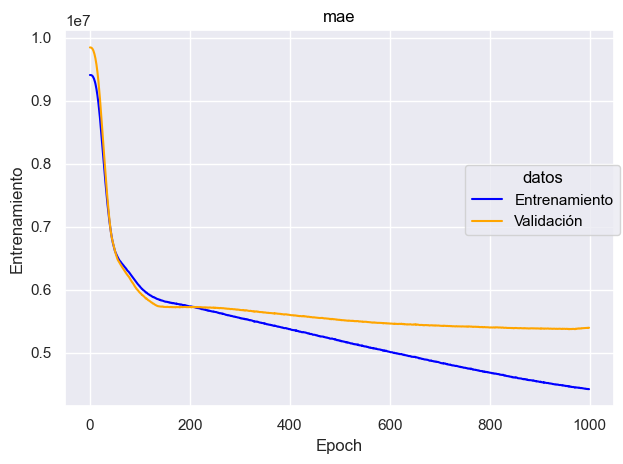

In [49]:
# Armamos una funcion para graficar el error a través de las épocas
def graficar_error(history, error_name):
    x_arr = np.array(history.epoch)    # en el atributo epoch, history guarda una lista de epocas
    y_train = history.history[error_name]
    y_val = history.history[f'val_{error_name}']
    data = pd.DataFrame({
        'Epoch': x_arr,
        'Entrenamiento': y_train,
        'Validación': y_val
    })
    plot = (
        so.Plot(data, x='Epoch')
        .add(so.Line(color='blue'), y='Entrenamiento', label='Entrenamiento')
        .add(so.Line(color='orange'), y='Validación', label='Validación')
        .label(title=error_name, legend="datos")
    )
    plot.show()
graficar_error(hist, 'mae')

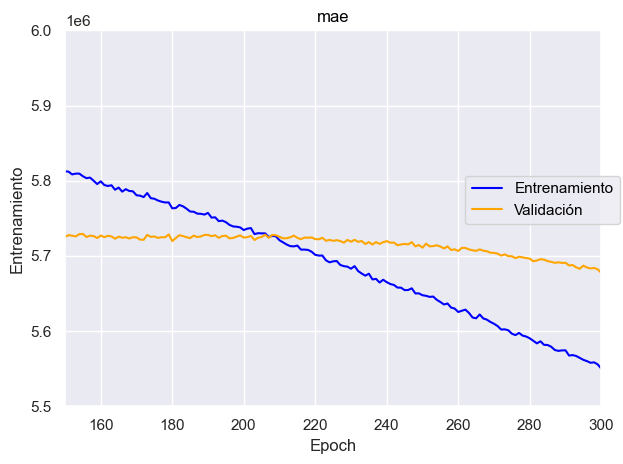

In [50]:
# Armamos una funcion para graficar el error a través de las épocas
def graficar_error_zoom(history, error_name):
    x_arr = np.array(history.epoch)    # en el atributo epoch, history guarda una lista de epocas
    y_train = history.history[error_name]
    y_val = history.history[f'val_{error_name}']
    data = pd.DataFrame({
        'Epoch': x_arr,
        'Entrenamiento': y_train,
        'Validación': y_val
    })
    plot = (
        so.Plot(data=data, x='Epoch')
        .add(so.Line(color='blue'), y='Entrenamiento', label='Entrenamiento')
        .add(so.Line(color='orange'), y='Validación', label='Validación')
        .limit(x=(150,300), y=(0.55e7, 0.6e7))
        .label(title=error_name)
    )
    plot.show()
graficar_error_zoom(hist, 'mae')

*   **Epochs:** Se observa que a partir de 225, no mejora el mae, en entrenamiento y validación. Por lo cual se toma ese valor.

In [51]:
# Cargar y codificar variables categóricas
datos = pd.get_dummies(df_valuacion_jugadores, columns=['position', 'position2'])

# Separar características y la variable objetivo ('value')
features = datos.drop(columns=['player', 'nationality', 'squad', 'birth_year',
                            'height', 'league', 'Season', 'value'])
target = datos['value']


# Normalizar las características
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Una salida para el valor estimado
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
hist = model.fit(X_train, y_train, epochs=225, batch_size=20, validation_split=0.2, verbose=0)

# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f'MAE en el conjunto de prueba: {mae}')



c:\Users\mgres\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117347138404352.0000 - mae: 5998093.0000 
MAE en el conjunto de prueba: 5978420.0


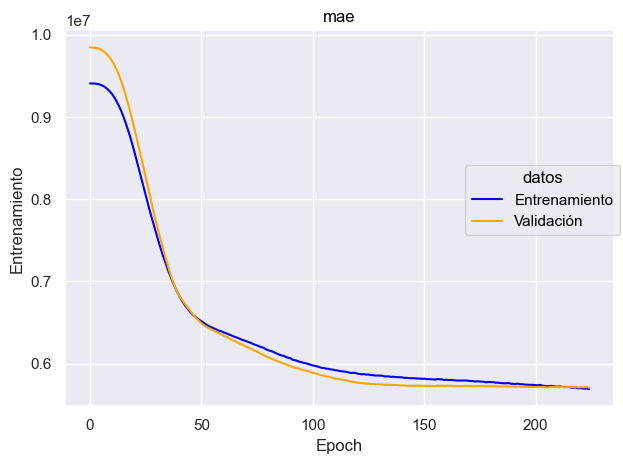

In [52]:
graficar_error(hist, 'mae')

In [53]:
# Predecir los valores de mercado con el modelo entrenado
predicted_values = model.predict(features_scaled)

# Tabla para comparar
df_valores = df_valuacion_jugadores[['player','position','position2','squad','value']].copy()

# Agregar la columna de predicciones al DataFrame original y la diferencia
df_valores.loc[:,'predicted_value'] = predicted_values.flatten().astype(int)
df_valores.loc[:,'diferencia'] = df_valores.value - df_valores.predicted_value

# Agregar la columna status_mkt
df_valores['status_mkt'] = df_valores.apply(
    lambda fila: 'Sobrevalorado' if fila['value'] > fila['predicted_value'] else 'Infravalorado', 
    axis=1
)

df_valores.head()

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,player,position,position2,squad,value,predicted_value,diferencia,status_mkt
0,Martin Aguirregabiria,DF,Defender - Right-Back,Alavés,4000000,427417,3572583,Sobrevalorado
1,Oliver Burke,"MF,FW",Forward - Right Winger,Alavés,4000000,1291202,2708798,Sobrevalorado
2,Ví­ctor Camarasa,MF,Midfielder - Central Midfield,Alavés,4000000,9979,3990021,Sobrevalorado
3,Rubén Duarte,DF,Defender - Left-Back,Alavés,4000000,605259,3394741,Sobrevalorado
4,Rodrigo Ely,DF,Defender - Centre-Back,Alavés,1000000,1750261,-750261,Infravalorado


*   **(c)** Según el modelo desarrollado, entre los jugadores con un valor de mercado mayor a $100000, ¿quién es el más sobrevalorado? Es decir, el jugador con mayor diferencia entre el valor de mercado y el valor predicho por el modelo. ¿Y el más infravalorado?.

In [54]:
df_filtrado = df_valores[df_valores.value > 100000]

# Encontrar el más sobrevalorado
jugador_sobrevalorado = df_filtrado.loc[df_filtrado['diferencia'].idxmax()]

# Encontrar el más infravalorado
jugador_infravalorado = df_filtrado.loc[df_filtrado['diferencia'].idxmin()]

pd.DataFrame([jugador_sobrevalorado, jugador_infravalorado])

,player,position,position2,squad,value,predicted_value,diferencia,status_mkt
1858,Kylian Mbappé,FW,Forward - Left Winger,Paris S-G,180000000,62262808,117737192,Sobrevalorado
1429,David Silva,MF,Midfielder - Attacking Midfield,Manchester City,12000000,50282032,-38282032,Infravalorado


*   **(d)** El PSG quiere vender a Mbappe y reemplazarlo por otro jugador más barato. Hacer un listado de los 10 jugadores más parecidos a Mbappé según el criterio que elijan. De esos 10 jugadores, según el modelo que desarrollaron en el ítem anterior, ¿a qué jugador recomendarían teniendo en cuenta la valuación del mercado y la predicción del modelo? Para ese jugador, averiguar la valuación actual del jugador. ¿Hicieron una buena recomendación?

In [55]:
# Reentreno el modelo si es necesario
knn_model.fit(features_scaled)

# Encontrar los vecinos más cercanos al jugador de referencia 'Kylian Mbappé'
reference_player_index2 = df_valuacion_jugadores[df_valuacion_jugadores['player'] == 'Kylian Mbappé'].index[0]
reference_player_features2 = features_scaled.iloc[reference_player_index2].values.reshape(1, -1)

distances2, indices2 = knn_model.kneighbors(reference_player_features2)

# Obtener los índices de los jugadores similares
similar_player_indices2 = indices2.flatten()

# Jugadores similares
similar_players2 = df_valuacion_jugadores.iloc[similar_player_indices2][['player','position','position2','squad','value']]

#Recomendados
recomendados = similar_players2[(similar_players2.squad != 'Paris S-G') & (similar_players2.value < similar_players2.loc[reference_player_index2].value)]
df_valores.loc[recomendados.index]

c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,player,position,position2,squad,value,predicted_value,diferencia,status_mkt
279,Serge Gnabry,"FW,MF",Forward - Right Winger,Bayern Munich,72000000,54719192,17280808,Sobrevalorado
162,Duván Zapata,FW,Forward - Centre-Forward,Atalanta,36000000,42222848,-6222848,Infravalorado
265,Luis Suárez,FW,Forward - Centre-Forward,Barcelona,28000000,41461360,-13461360,Infravalorado
1528,Marcus Thuram,FW,Forward - Left Winger,M'Gladbach,22000000,41320824,-19320824,Infravalorado
589,Christian Pulisic,FW,Forward - Left Winger,Chelsea,54000000,41225260,12774740,Sobrevalorado
1421,Gabriel Jesus,FW,Forward - Centre-Forward,Manchester City,56000000,48348328,7651672,Sobrevalorado
1411,Sergio AgíĽero,FW,Forward - Centre-Forward,Manchester City,52000000,42530256,9469744,Sobrevalorado
1920,Timo Werner,FW,Forward - Centre-Forward,RB Leipzig,64000000,58959852,5040148,Sobrevalorado
1082,Gonzalo Higuaí­n,FW,Forward - Centre-Forward,Juventus,25000000,32315636,-7315636,Infravalorado


In [56]:
#Se recomienda al jugador Marcus Thuram, ya que está infravalorado, juega en la misma posicion que Mbappe y es de los más parecidos a él
df_valores[df_valores.player.isin(['Kylian Mbappé','Marcus Thuram'])]

,player,position,position2,squad,value,predicted_value,diferencia,status_mkt
1528,Marcus Thuram,FW,Forward - Left Winger,M'Gladbach,22000000,41320824,-19320824,Infravalorado
1858,Kylian Mbappé,FW,Forward - Left Winger,Paris S-G,180000000,62262808,117737192,Sobrevalorado
